In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', 50)
np.random.seed(42)

# Rutas
BASE_DIR = Path().resolve().parent
DATA_PATH = BASE_DIR / 'data' / 'gold' / 'model' / 'classification_event_dataset.parquet'

In [3]:
# Cargar datos
df = pd.read_parquet(DATA_PATH)
print(f"Shape: {df.shape}")
print(f"\nColumnas ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2}. {col}")
df.head()

Shape: (343861, 63)

Columnas (63):
   1. departamento
   2. municipio
   3. edad_persona
   4. armas_medios
   5. cantidad
   6. fecha
   7. genero
   8. anio
   9. delito
  10. codigo_municipio
  11. mes
  12. dia
  13. es_dia_semana
  14. es_fin_de_semana
  15. es_fin_mes
  16. es_festivo
  17. nombre_festivo
  18. es_dia_laboral
  19. origen
  20. codigo_departamento
  21. municipio_ctx
  22. area
  23. departamento_ctx
  24. Shape_Leng
  25. Shape_Area
  26. geometry
  27. n_centros_poblados
  28. total_delitos
  29. ABIGEATO
  30. AMENAZAS
  31. DELITOS SEXUALES
  32. EXTORSION
  33. HOMICIDIOS
  34. HURTOS
  35. LESIONES
  36. VIOLENCIA INTRAFAMILIAR
  37. femenino_adolescentes
  38. femenino_adultos
  39. femenino_menores
  40. masculino_adolescentes
  41. masculino_adultos
  42. masculino_menores
  43. poblacion_total
  44. poblacion_menores
  45. poblacion_adultos
  46. poblacion_adolescentes
  47. area_km2
  48. densidad_poblacional
  49. centros_por_km2
  50. proporcion_men

,departamento,municipio,edad_persona,armas_medios,cantidad,fecha,genero,anio,delito,codigo_municipio,mes,dia,es_dia_semana,es_fin_de_semana,es_fin_mes,es_festivo,nombre_festivo,es_dia_laboral,origen,codigo_departamento,municipio_ctx,area,departamento_ctx,Shape_Leng,Shape_Area,...,femenino_menores,masculino_adolescentes,masculino_adultos,masculino_menores,poblacion_total,poblacion_menores,poblacion_adultos,poblacion_adolescentes,area_km2,densidad_poblacional,centros_por_km2,proporcion_menores,proporcion_adultos,proporcion_adolescentes,fecha_ctx,trimestre,anio_mes,es_fin_ano,n_dias_semana,n_fines_de_semana,n_festivos,n_dias_laborales,mes_sin,mes_cos,perfil
0,SANTANDER,FLORIÁN,ADULTOS,NO REPORTADO,1,2010-01-05,MASCULINO,2010,ABIGEATO,68271,1,5,1,0,0,0,None,1,SCRAPING,68,FLORIÁN,176.599655,SANTANDER,0.892371,0.014419,...,982,372,5335,1079,12682,2061,9959,662,176.599655,71.812145,0.022650,0.162514,0.785286,0.052200,2010-01-01,1,2010-01,0,2,2,1,1,0.5,0.866025,MASCULINO_ADULTOS
1,SANTANDER,PUENTE NACIONAL,ADULTOS,NO REPORTADO,1,2010-01-06,MASCULINO,2010,ABIGEATO,68572,1,6,1,0,0,0,None,1,SCRAPING,68,PUENTE NACIONAL,251.678548,SANTANDER,0.755909,0.020549,...,1722,642,10725,1833,26902,3555,22030,1317,251.678548,106.890318,0.027813,0.132146,0.818898,0.048955,2010-01-01,1,2010-01,0,13,4,0,13,0.5,0.866025,MASCULINO_ADULTOS
2,SANTANDER,PUENTE NACIONAL,ADULTOS,ARMA DE FUEGO,1,2010-01-07,MASCULINO,2010,ABIGEATO,68572,1,7,1,0,0,0,None,1,SCRAPING,68,PUENTE NACIONAL,251.678548,SANTANDER,0.755909,0.020549,...,1722,642,10725,1833,26902,3555,22030,1317,251.678548,106.890318,0.027813,0.132146,0.818898,0.048955,2010-01-01,1,2010-01,0,13,4,0,13,0.5,0.866025,MASCULINO_ADULTOS
3,SANTANDER,BARRANCABERMEJA,ADULTOS,NO REPORTADO,1,2010-01-10,MASCULINO,2010,ABIGEATO,68081,1,10,0,1,0,0,None,0,SCRAPING,68,BARRANCABERMEJA,1326.838302,SANTANDER,2.735190,0.108591,...,25413,10056,151760,26622,382996,52035,311624,19337,1326.838302,288.653108,0.005276,0.135863,0.813648,0.050489,2010-01-01,1,2010-01,0,85,53,15,70,0.5,0.866025,MASCULINO_ADULTOS
4,SANTANDER,MOGOTES,ADULTOS,NO REPORTADO,1,2010-01-17,MASCULINO,2010,ABIGEATO,68464,1,17,0,1,0,0,None,0,SCRAPING,68,MOGOTES,483.970127,SANTANDER,1.104474,0.039550,...,1622,625,8816,1711,21826,3333,17294,1199,483.970127,45.097825,0.008265,0.152708,0.792358,0.054934,2010-01-01,1,2010-01,0,4,1,1,3,0.5,0.866025,MASCULINO_ADULTOS


In [4]:
# Info general
print("=" * 60)
print("INFO GENERAL")
print("=" * 60)
print(f"\nTotal eventos: {len(df):,}")
print(f"Período: {df['anio'].min()} - {df['anio'].max()}")
print(f"Municipios: {df['codigo_municipio'].nunique()}")
print(f"\nValores nulos por columna:")
nulls = df.isnull().sum()
print(nulls[nulls > 0])

INFO GENERAL

Total eventos: 343,861
Período: 2010 - 2025
Municipios: 87

Valores nulos por columna:
nombre_festivo    327424
dtype: int64
nombre_festivo    327424
dtype: int64
nombre_festivo    327424
dtype: int64


## 1. Balance de Clases - Delito

In [5]:
# Balance de clases: delito
print("=" * 60)
print("BALANCE DE CLASES: delito")
print("=" * 60)

delito_counts = df['delito'].value_counts()
delito_pct = df['delito'].value_counts(normalize=True) * 100

balance_delito = pd.DataFrame({
    'count': delito_counts,
    'porcentaje': delito_pct.round(2)
})
print(balance_delito)

# Ratio de desbalance
ratio = delito_counts.max() / delito_counts.min()
print(f"\nRatio max/min: {ratio:.2f}")
print(f"Clase mayoritaria: {delito_counts.idxmax()} ({delito_counts.max():,})")
print(f"Clase minoritaria: {delito_counts.idxmin()} ({delito_counts.min():,})")

BALANCE DE CLASES: delito
                          count  porcentaje
delito                                     
LESIONES                 122348       35.58
HURTOS                   104201       30.30
VIOLENCIA INTRAFAMILIAR   55049       16.01
AMENAZAS                  32123        9.34
DELITOS SEXUALES          16561        4.82
HOMICIDIOS                 9340        2.72
EXTORSION                  2952        0.86
ABIGEATO                   1287        0.37

Ratio max/min: 95.06
Clase mayoritaria: LESIONES (122,348)
Clase minoritaria: ABIGEATO (1,287)


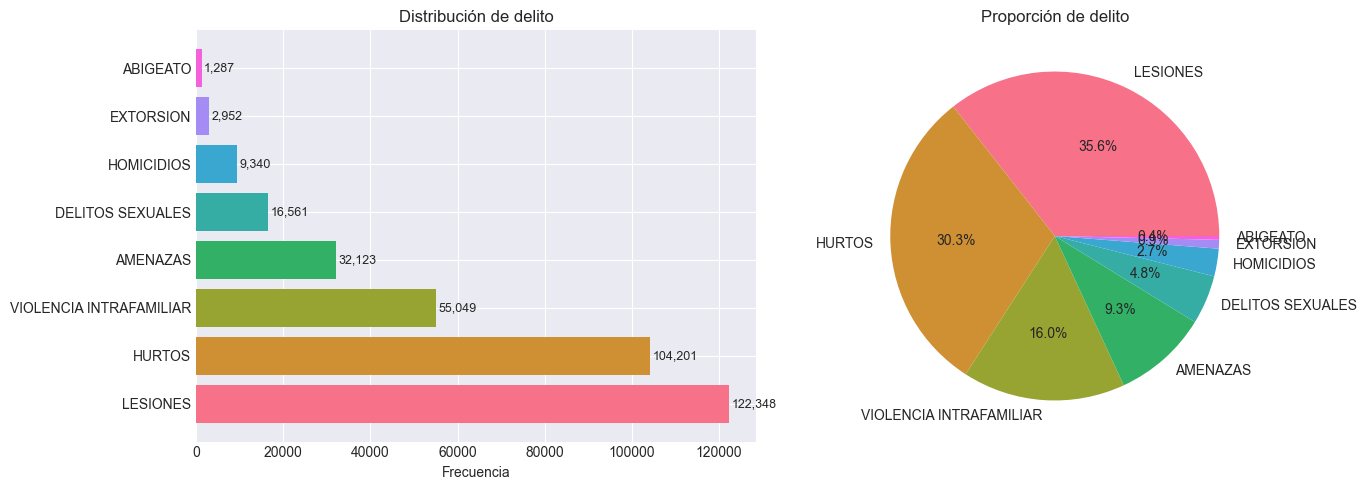

In [6]:
# Visualización balance delito
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = sns.color_palette('husl', len(delito_counts))

# Barplot
ax1 = axes[0]
bars = ax1.barh(delito_counts.index, delito_counts.values, color=colors)
ax1.set_xlabel('Frecuencia')
ax1.set_title('Distribución de delito')
for bar, val in zip(bars, delito_counts.values):
    ax1.text(val + 500, bar.get_y() + bar.get_height()/2, f'{val:,}', va='center', fontsize=9)

# Pie chart
ax2 = axes[1]
ax2.pie(delito_counts.values, labels=delito_counts.index, autopct='%1.1f%%', colors=colors)
ax2.set_title('Proporción de delito')

plt.tight_layout()
plt.show()

## 2. Balance de Clases - Armas/Medios

In [7]:
# Balance de clases: armas_medios
print("=" * 60)
print("BALANCE DE CLASES: armas_medios")
print("=" * 60)

arma_counts = df['armas_medios'].value_counts()
arma_pct = df['armas_medios'].value_counts(normalize=True) * 100

balance_arma = pd.DataFrame({
    'count': arma_counts,
    'porcentaje': arma_pct.round(2)
})
print(balance_arma.head(20))

print(f"\nTotal categorías: {len(arma_counts)}")
print(f"Clases con <1000 muestras: {(arma_counts < 1000).sum()}")
print(f"Clases con <100 muestras: {(arma_counts < 100).sum()}")

BALANCE DE CLASES: armas_medios
                              count  porcentaje
armas_medios                                   
SIN EMPLEO DE ARMAS          108771       31.63
CONTUNDENTES                  97292       28.29
ARMA BLANCA / CORTOPUNZANTE   50808       14.78
NO REPORTADO                  42574       12.38
ARMA DE FUEGO                 22572        6.56
VEHICULO                       7112        2.07
MOTO                           4304        1.25
PALANCAS                       2915        0.85
LLAMADA TELEFONICA             1556        0.45
ESCOPOLAMINA                   1103        0.32
LLAVE MAESTRA                  1076        0.31
ACIDO                           918        0.27
DIRECTA                         533        0.16
PUNZANTES                       471        0.14
REDES SOCIALES                  319        0.09
CORTANTES                       295        0.09
PERRO                           256        0.07
ARMA TRAUMATICA                 193        0.06
MIXTA   

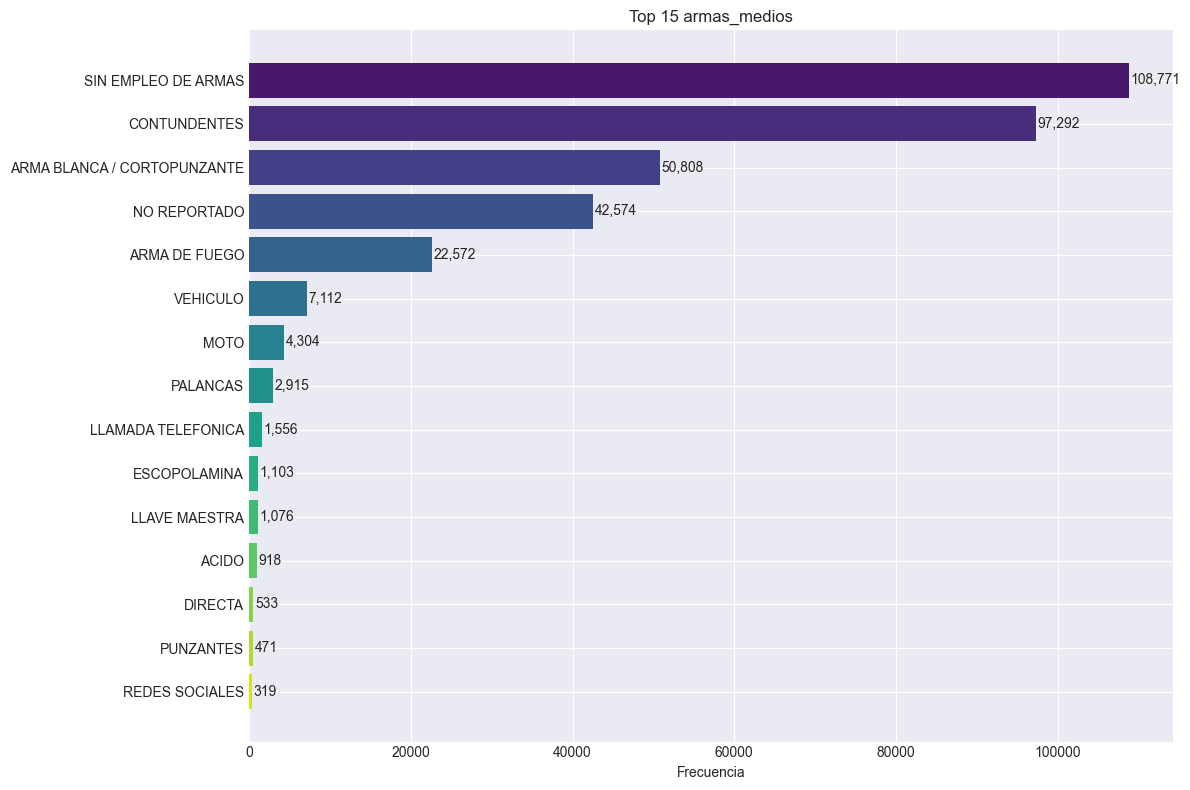

In [8]:
# Visualización top 15 armas_medios
fig, ax = plt.subplots(figsize=(12, 8))

top_armas = arma_counts.head(15)
colors = sns.color_palette('viridis', len(top_armas))
bars = ax.barh(top_armas.index, top_armas.values, color=colors)
ax.set_xlabel('Frecuencia')
ax.set_title('Top 15 armas_medios')
ax.invert_yaxis()

for bar, val in zip(bars, top_armas.values):
    ax.text(val + 200, bar.get_y() + bar.get_height()/2, f'{val:,}', va='center')

plt.tight_layout()
plt.show()

## 3. Balance de Clases - Perfil

In [9]:
# Balance de clases: perfil
print("=" * 60)
print("BALANCE DE CLASES: perfil")
print("=" * 60)

perfil_counts = df['perfil'].value_counts()
perfil_pct = df['perfil'].value_counts(normalize=True) * 100

balance_perfil = pd.DataFrame({
    'count': perfil_counts,
    'porcentaje': perfil_pct.round(2)
})
print(balance_perfil)

# Ratio de desbalance
ratio = perfil_counts.max() / perfil_counts.min()
print(f"\nRatio max/min: {ratio:.2f}")

BALANCE DE CLASES: perfil
                          count  porcentaje
perfil                                     
MASCULINO_ADULTOS        163424       47.53
FEMENINO_ADULTOS         143049       41.60
FEMENINO_ADOLESCENTES     12086        3.51
MASCULINO_ADOLESCENTES    11221        3.26
FEMENINO_MENORES           8523        2.48
MASCULINO_MENORES          5429        1.58
NO REPORTA_ADULTOS          124        0.04
NO REPORTA_MENORES            4        0.00
NO REPORTA_ADOLESCENTES       1        0.00

Ratio max/min: 163424.00


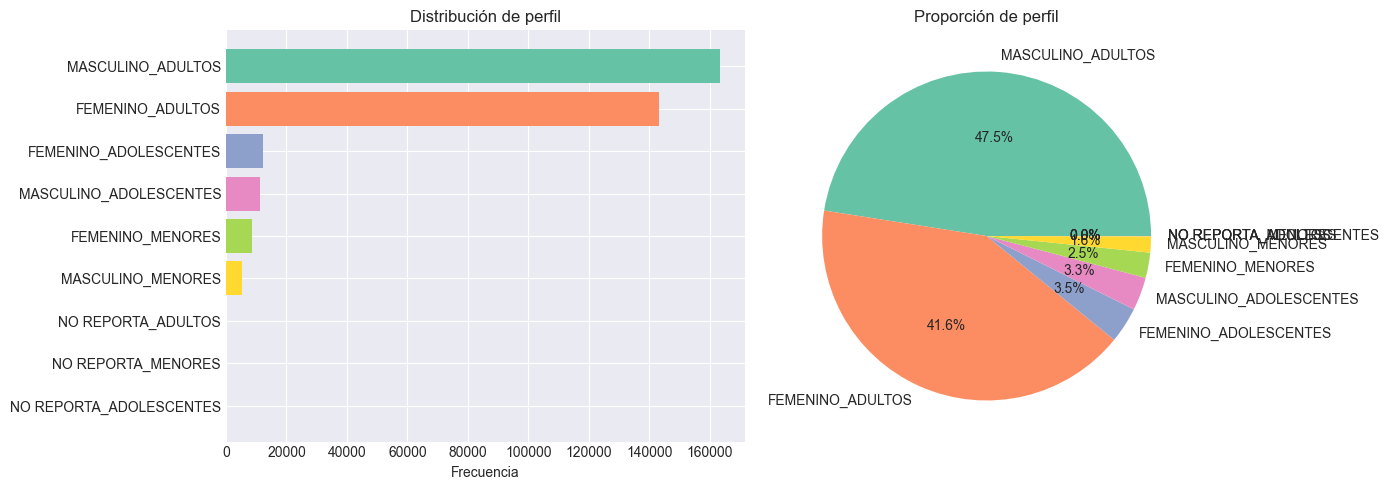

In [10]:
# Visualización perfil
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = sns.color_palette('Set2', len(perfil_counts))

# Barplot
ax1 = axes[0]
bars = ax1.barh(perfil_counts.index, perfil_counts.values, color=colors)
ax1.set_xlabel('Frecuencia')
ax1.set_title('Distribución de perfil')
ax1.invert_yaxis()

# Pie chart
ax2 = axes[1]
ax2.pie(perfil_counts.values, labels=perfil_counts.index, autopct='%1.1f%%', colors=colors)
ax2.set_title('Proporción de perfil')

plt.tight_layout()
plt.show()

## 4. Análisis de Features Numéricas

In [11]:
# Identificar columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Columnas numéricas ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"  - {col}")

# Estadísticas descriptivas
df[numeric_cols].describe()

Columnas numéricas (47):
  - cantidad
  - anio
  - codigo_municipio
  - mes
  - dia
  - es_dia_semana
  - es_fin_de_semana
  - es_fin_mes
  - es_festivo
  - es_dia_laboral
  - area
  - Shape_Leng
  - Shape_Area
  - n_centros_poblados
  - total_delitos
  - ABIGEATO
  - AMENAZAS
  - DELITOS SEXUALES
  - EXTORSION
  - HOMICIDIOS
  - HURTOS
  - LESIONES
  - VIOLENCIA INTRAFAMILIAR
  - femenino_adolescentes
  - femenino_adultos
  - femenino_menores
  - masculino_adolescentes
  - masculino_adultos
  - masculino_menores
  - poblacion_total
  - poblacion_menores
  - poblacion_adultos
  - poblacion_adolescentes
  - area_km2
  - densidad_poblacional
  - centros_por_km2
  - proporcion_menores
  - proporcion_adultos
  - proporcion_adolescentes
  - trimestre
  - es_fin_ano
  - n_dias_semana
  - n_fines_de_semana
  - n_festivos
  - n_dias_laborales
  - mes_sin
  - mes_cos


,cantidad,anio,codigo_municipio,mes,dia,es_dia_semana,es_fin_de_semana,es_fin_mes,es_festivo,es_dia_laboral,area,Shape_Leng,Shape_Area,n_centros_poblados,total_delitos,ABIGEATO,AMENAZAS,DELITOS SEXUALES,EXTORSION,HOMICIDIOS,HURTOS,LESIONES,VIOLENCIA INTRAFAMILIAR,femenino_adolescentes,femenino_adultos,femenino_menores,masculino_adolescentes,masculino_adultos,masculino_menores,poblacion_total,poblacion_menores,poblacion_adultos,poblacion_adolescentes,area_km2,densidad_poblacional,centros_por_km2,proporcion_menores,proporcion_adultos,proporcion_adolescentes,trimestre,es_fin_ano,n_dias_semana,n_fines_de_semana,n_festivos,n_dias_laborales,mes_sin,mes_cos
count,343861.000000,343861.000000,343861.000000,343861.000000,343861.0,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.00000,343861.000000,343861.000000,343861.000000,3.438610e+05,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.000000,343861.00000,343861.000000,3.438610e+05,3.438610e+05
mean,1.340475,2018.368440,68242.420033,6.341085,15.474285,0.674973,0.325027,0.032153,0.047801,0.633928,492.994942,1.302363,0.040338,4.479176,473.160143,0.329770,32.312810,18.120517,2.980873,7.767999,189.753790,138.474500,83.419885,10692.040839,156778.046615,28111.56257,11028.149741,140590.083615,29380.791779,3.765807e+05,57492.354350,297368.130230,21720.190580,492.994942,2228.759468,0.015985,0.175536,0.760991,0.063473,2.450470,0.070648,237.143017,104.211615,14.26789,224.543164,5.807053e-03,-2.813864e-02
std,1.009039,4.515276,245.835640,3.391308,8.83098,0.468385,0.468385,0.176405,0.213346,0.481730,569.918998,0.890906,0.046623,4.016375,473.018255,1.001689,35.771228,17.193629,4.520100,8.542290,250.757848,141.173249,80.563549,8223.961290,143656.304393,20626.14238,8443.529456,128392.257895,21494.805492,3.244579e+05,42120.518631,271991.496539,16666.595602,569.918998,2435.147838,0.018659,0.049999,0.065531,0.016379,1.103246,0.256236,261.639567,114.996188,18.94719,249.988481,7.154398e-01,6.980854e-01
min,1.000000,2010.000000,68001.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,19.694442,0.270018,0.001610,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,423.000000,130.00000,47.000000,434.000000,143.000000,1.314000e+03,273.000000,857.000000,89.000000,19.694442,6.373106,0.002687,0.103180,0.603927,0.033758,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000e+00,-1.000000e+00
25%,1.000000,2015.000000,68001.000000,3.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,152.915686,0.693489,0.012514,1.000000,70.000000,0.000000,5.000000,4.000000,0.000000,1.000000,12.000000,29.000000,12.000000,2111.000000,31707.000000,6068.00000,2152.000000,33438.000000,6232.000000,8.059800e+04,12300.000000,65145.000000,4259.000000,152.915686,163.038706,0.006540,0.124382,0.711454,0.044802,1.000000,0.000000,41.000000,22.000000,0.00000,38.000000,-8.660254e-01,-8.660254e-01
50%,1.000000,2018.000000,68190.000000,6.000000,15.0,1.000000,0.000000,0.000000,0.000000,1.000000,152.915686,0.693489,0.012514,4.000000,297.000000,0.000000,18.000000,13.000000,1.000000,5.000000,85.000000,83.000000,61.000000,8093.000000,125651.000000,24818.00000,8546.000000,110671.000000,25883.000000,3.054140e+05,50701.000000,240274.000000,16639.000000,152.915686,630.275388,0.006808,0.182243,0.747250,0.070432,2.000000,0.000000,158.000000,71.000000,8.00000,149.000000,1.224647e-16,-1.836970e-16
75%,1.000000,2022.000000,68406.000000,9.000000,23.0,1.000000,1.000000,0.000000,0.000000,1.000000,493.029887,2.010667,0.040342,7.000000,839.000000,0.000000,52.000000,29.000000,4.000000,12.000000,265.000000,213.000000,127.000000,21269.000000,2

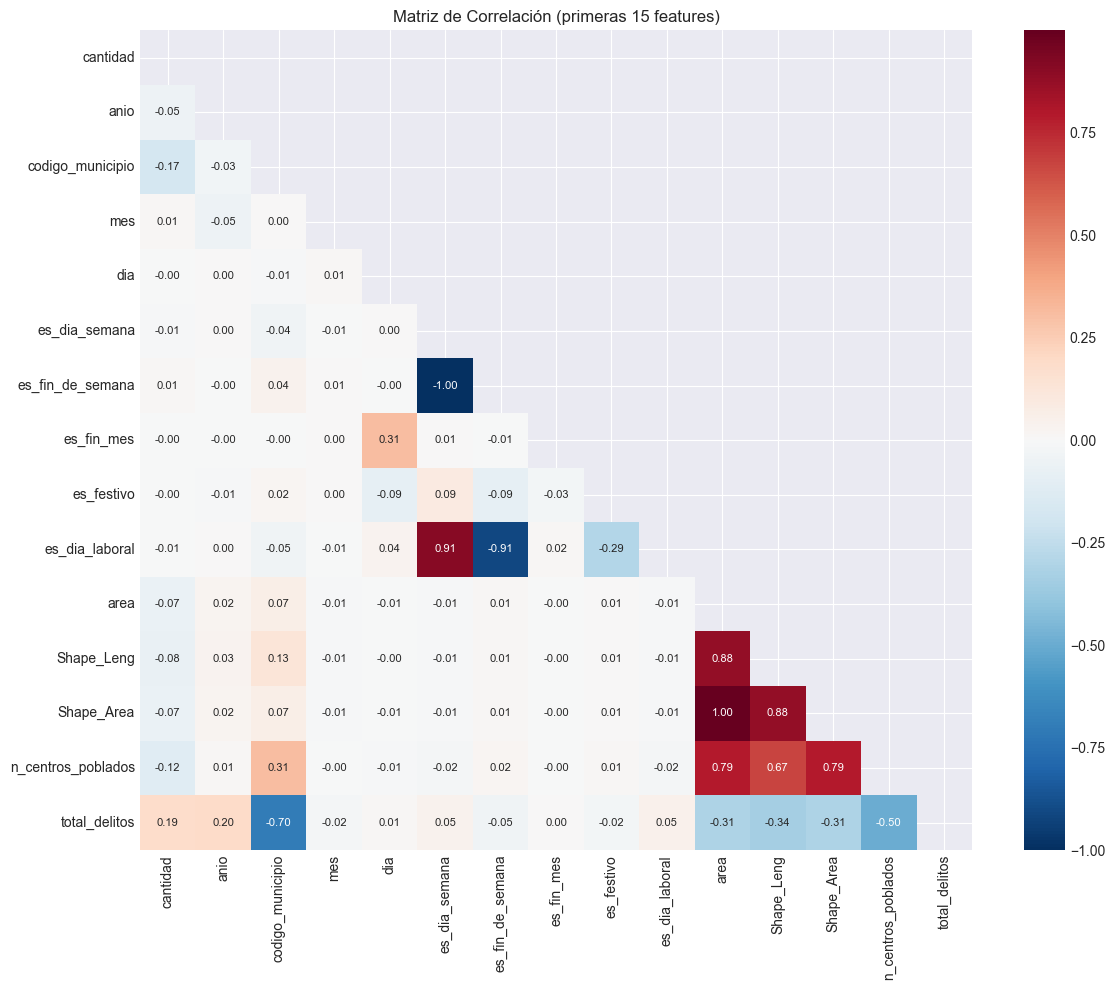

In [12]:
# Matriz de correlación (solo primeras 15 columnas numéricas para legibilidad)
cols_for_corr = numeric_cols[:15]

fig, ax = plt.subplots(figsize=(12, 10))
corr_matrix = df[cols_for_corr].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, ax=ax, annot_kws={'size': 8})
ax.set_title('Matriz de Correlación (primeras 15 features)')
plt.tight_layout()
plt.show()

## 5. Conclusiones y Recomendaciones

In [13]:
print("=" * 60)
print("CONCLUSIONES")
print("=" * 60)

def evaluar_balance(counts, nombre):
    ratio = counts.max() / counts.min()
    n_raras = (counts < counts.sum() * 0.01).sum()  # <1% del total
    
    if ratio > 50 or n_raras > len(counts) * 0.5:
        status = "⚠️ MUY DESBALANCEADO"
        recomendacion = "SMOTE/ADASYN o agrupar clases minoritarias"
    elif ratio > 10:
        status = "⚡ DESBALANCEADO"
        recomendacion = "class_weight='balanced' o undersampling"
    elif ratio > 3:
        status = "⚡ MODERADO"
        recomendacion = "class_weight='balanced'"
    else:
        status = "✅ BALANCEADO"
        recomendacion = "No requiere balanceo"
    
    print(f"\n{nombre}:")
    print(f"  Categorías: {len(counts)}")
    print(f"  Ratio max/min: {ratio:.2f}")
    print(f"  Status: {status}")
    print(f"  Recomendación: {recomendacion}")

evaluar_balance(delito_counts, "delito")
evaluar_balance(arma_counts, "armas_medios")
evaluar_balance(perfil_counts, "perfil")


CONCLUSIONES

delito:
  Categorías: 8
  Ratio max/min: 95.06
  Status: ⚠️ MUY DESBALANCEADO
  Recomendación: SMOTE/ADASYN o agrupar clases minoritarias

armas_medios:
  Categorías: 48
  Ratio max/min: 108771.00
  Status: ⚠️ MUY DESBALANCEADO
  Recomendación: SMOTE/ADASYN o agrupar clases minoritarias

perfil:
  Categorías: 9
  Ratio max/min: 163424.00
  Status: ⚠️ MUY DESBALANCEADO
  Recomendación: SMOTE/ADASYN o agrupar clases minoritarias


## 6. Procesamiento y Balanceo de Datos

In [14]:
# Crear copia para procesamiento
df_processed = df.copy()

print("=" * 60)
print("ESTRATEGIA DE BALANCEO")
print("=" * 60)

# Recalcular conteos (por si no se ejecutaron las celdas anteriores)
delito_counts = df['delito'].value_counts()
arma_counts = df['armas_medios'].value_counts()
perfil_counts = df['perfil'].value_counts()

# 1. DELITO: Usar class_weight='balanced'
print("\n1. DELITO - Usar class_weight='balanced' en modelo")
print(f"   ✓ Ratio: {delito_counts.max() / delito_counts.min():.2f}")

# 2. PERFIL: Agrupar "NO REPORTA"
print("\n2. PERFIL - Agrupar categorías 'NO REPORTA'")
print(f"   Clases originales: {len(perfil_counts)}")
print(f"   Balance ANTES:")
print(f"   {perfil_counts.to_string()}")

# Agrupar todas las variantes de "NO REPORTA" en una sola categoría
df_processed['perfil'] = df_processed['perfil'].str.upper()
df_processed['perfil'] = df_processed['perfil'].apply(
    lambda x: 'NO REPORTA' if 'NO REPORTA' in str(x) else x
)

print(f"\n   Balance DESPUÉS de agrupación:")
new_perfil_counts = df_processed['perfil'].value_counts()
print(new_perfil_counts)
print(f"   Clases finales: {len(new_perfil_counts)}")

# 3. ARMAS_MEDIOS: Agrupación
print("\n3. ARMAS_MEDIOS - Agrupar clases minoritarias")
print(f"   Clases originales: {len(arma_counts)}")
print(f"   Clases con <100 muestras: {(arma_counts < 100).sum()}")

# Agrupar clases minoritarias (<100) en "OTROS"
threshold = 100
rare_classes = arma_counts[arma_counts < threshold].index.tolist()
df_processed['armas_medios'] = df_processed['armas_medios'].apply(
    lambda x: 'OTROS' if x in rare_classes else x
)

print(f"\n   Clases agrupadas a 'OTROS': {len(rare_classes)}")
print(f"\n   Balance después de agrupación:")
new_arma_counts = df_processed['armas_medios'].value_counts()
print(new_arma_counts)

ESTRATEGIA DE BALANCEO

1. DELITO - Usar class_weight='balanced' en modelo
   ✓ Ratio: 95.06

2. PERFIL - Agrupar categorías 'NO REPORTA'
   Clases originales: 9
   Balance ANTES:
   perfil
MASCULINO_ADULTOS          163424
FEMENINO_ADULTOS           143049
FEMENINO_ADOLESCENTES       12086
MASCULINO_ADOLESCENTES      11221
FEMENINO_MENORES             8523
MASCULINO_MENORES            5429
NO REPORTA_ADULTOS            124
NO REPORTA_MENORES              4
NO REPORTA_ADOLESCENTES         1

   Balance DESPUÉS de agrupación:
perfil
MASCULINO_ADULTOS         163424
FEMENINO_ADULTOS          143049
FEMENINO_ADOLESCENTES      12086
MASCULINO_ADOLESCENTES     11221
FEMENINO_MENORES            8523
MASCULINO_MENORES           5429
NO REPORTA                   129
Name: count, dtype: int64
   Clases finales: 7

3. ARMAS_MEDIOS - Agrupar clases minoritarias
   Clases originales: 48
   Clases con <100 muestras: 29

   Clases agrupadas a 'OTROS': 29

   Balance después de agrupación:
armas_medi

In [16]:
# Preparar datos para SMOTE en armas_medios
print("\n" + "=" * 60)
print("APLICAR SMOTE - armas_medios")
print("=" * 60)

# Seleccionar features numéricas para SMOTE
features_for_smote = df_processed.select_dtypes(include=[np.number]).columns.tolist()

# Codificar armas_medios
le_arma = LabelEncoder()
y_arma = le_arma.fit_transform(df_processed['armas_medios'])

X_features = df_processed[features_for_smote].fillna(df_processed[features_for_smote].mean())

# Convertir a float para evitar problemas con SMOTE
X_features_float = X_features.astype(np.float64)

# Aplicar SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_smote, y_smote = smote.fit_resample(X_features_float, y_arma)

print(f"Shape original: {X_features.shape}")
print(f"Shape después SMOTE: {X_smote.shape}")

# Crear dataframe balanceado
df_smote = pd.DataFrame(X_smote, columns=features_for_smote)

# Redondear columnas que eran integer originalmente
int_cols = df_processed[features_for_smote].select_dtypes(include=['int64', 'int32']).columns
df_smote[int_cols] = df_smote[int_cols].round().astype('int64')

df_smote['armas_medios'] = le_arma.inverse_transform(y_smote)

print(f"\nBalance después de SMOTE:")
print(df_smote['armas_medios'].value_counts().sort_values(ascending=False).head(10))
print(f"\nTipos de datos:")
print(df_smote.dtypes)


APLICAR SMOTE - armas_medios
Shape original: (343861, 47)
Shape después SMOTE: (2175420, 47)
Shape original: (343861, 47)
Shape después SMOTE: (2175420, 47)
Shape original: (343861, 47)
Shape después SMOTE: (2175420, 47)

Balance después de SMOTE:
armas_medios
NO REPORTADO                   108771
ARMA DE FUEGO                  108771
ARMA BLANCA / CORTOPUNZANTE    108771
SIN EMPLEO DE ARMAS            108771
CONTUNDENTES                   108771
OTROS                          108771
DIRECTA                        108771
LLAMADA TELEFONICA             108771
MIXTA                          108771
REDES SOCIALES                 108771
Name: count, dtype: int64

Tipos de datos:
cantidad                     int64
anio                         int64
codigo_municipio             int64
mes                          int64
dia                          int64
es_dia_semana                int64
es_fin_de_semana             int64
es_fin_mes                   int64
es_festivo                   int64


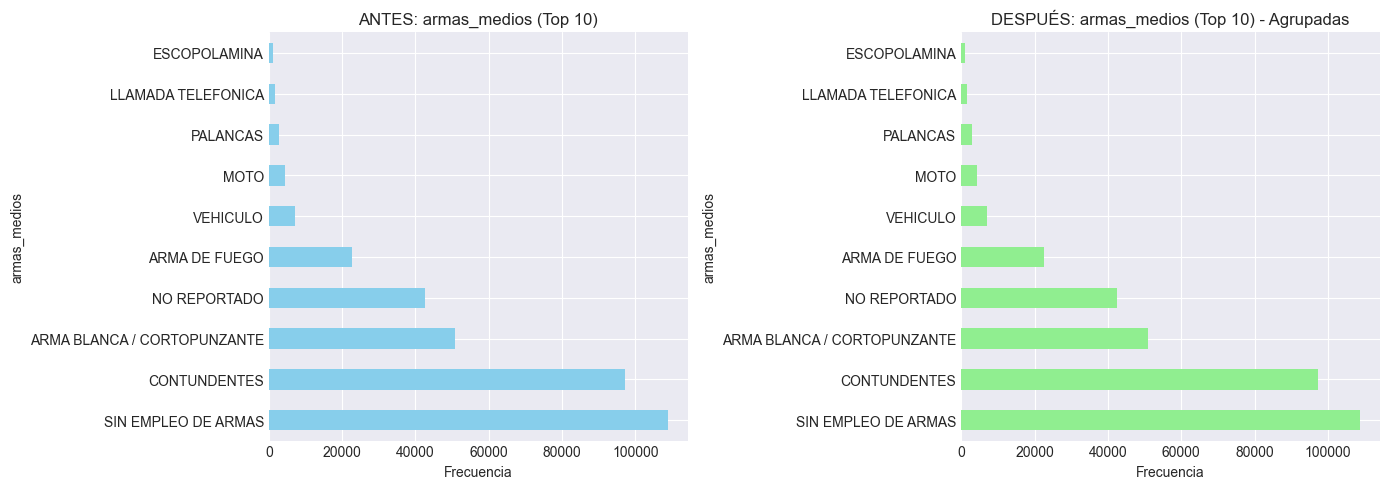

In [17]:
# Visualizar cambios en armas_medios
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Antes: armas_medios (top 10)
ax1 = axes[0]
arma_counts.head(10).plot(kind='barh', ax=ax1, color='skyblue')
ax1.set_title('ANTES: armas_medios (Top 10)')
ax1.set_xlabel('Frecuencia')

# Después: armas_medios (después agrupación)
ax2 = axes[1]
df_processed['armas_medios'].value_counts().head(10).plot(kind='barh', ax=ax2, color='lightgreen')
ax2.set_title('DESPUÉS: armas_medios (Top 10) - Agrupadas')
ax2.set_xlabel('Frecuencia')

plt.tight_layout()
plt.show()

In [18]:
# Ruta para guardar dataset procesado
PROCESSED_DATA_PATH = BASE_DIR / 'data' / 'model' / 'classification_event_dataset_processed.parquet'

# Crear carpeta si no existe
PROCESSED_DATA_PATH.parent.mkdir(parents=True, exist_ok=True)

# Guardar dataset
df_processed.to_parquet(PROCESSED_DATA_PATH, index=False)
print(f"✓ Dataset procesado guardado: {PROCESSED_DATA_PATH}")
print(f"  Shape: {df_processed.shape}")

✓ Dataset procesado guardado: C:\Users\57318\Downloads\mintic\Datos-al-Ecosistema\data\model\classification_event_dataset_processed.parquet
  Shape: (343861, 63)


## 7. Modelado: Clasificación Multi-Target

Entrenaremos modelos para predecir los tres targets: delito, armas_medios y perfil.

In [19]:
# 7.1 Importar librerías de modelado
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, 
    precision_score, recall_score, f1_score
)
import warnings
warnings.filterwarnings('ignore')

print("✓ Librerías de modelado importadas")

✓ Librerías de modelado importadas


In [20]:
# 7.2 Preparar datos para entrenamiento
print("=" * 60)
print("PREPARACIÓN DE DATOS PARA MODELADO")
print("=" * 60)

# Columnas numéricas disponibles
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()

# Features numéricos disponibles (excluir targets)
numeric_cols_model = [c for c in numeric_cols if c not in ['delito', 'armas_medios', 'perfil']]

print(f"\nFeatures numéricos para modelo: {len(numeric_cols_model)}")
print(f"  {numeric_cols_model[:10]}{'...' if len(numeric_cols_model) > 10 else ''}")

# Preparar X (features)
X = df_processed[numeric_cols_model].copy()

# Preparar targets y codificarlos
targets = {
    'delito': 'delito',
    'armas_medios': 'armas_medios',
    'perfil': 'perfil'
}

label_encoders = {}
y_encoded = {}

print(f"\nCodificando targets:")
for target_name, col_name in targets.items():
    le = LabelEncoder()
    y_encoded[target_name] = le.fit_transform(df_processed[col_name])
    label_encoders[target_name] = le
    print(f"  {target_name}: {len(le.classes_)} clases")
    print(f"    {le.classes_[:5]}{'...' if len(le.classes_) > 5 else ''}")

print(f"\nShape X: {X.shape}")
print(f"Total NaN en X: {X.isna().sum().sum()}")

PREPARACIÓN DE DATOS PARA MODELADO

Features numéricos para modelo: 47
  ['cantidad', 'anio', 'codigo_municipio', 'mes', 'dia', 'es_dia_semana', 'es_fin_de_semana', 'es_fin_mes', 'es_festivo', 'es_dia_laboral']...

Codificando targets:
  delito: 8 clases
    ['ABIGEATO' 'AMENAZAS' 'DELITOS SEXUALES' 'EXTORSION' 'HOMICIDIOS']...
  armas_medios: 20 clases
    ['ACIDO' 'ARMA BLANCA / CORTOPUNZANTE' 'ARMA DE FUEGO' 'ARMA TRAUMATICA'
 'CONTUNDENTES']...

Codificando targets:
  delito: 8 clases
    ['ABIGEATO' 'AMENAZAS' 'DELITOS SEXUALES' 'EXTORSION' 'HOMICIDIOS']...
  armas_medios: 20 clases
    ['ACIDO' 'ARMA BLANCA / CORTOPUNZANTE' 'ARMA DE FUEGO' 'ARMA TRAUMATICA'
 'CONTUNDENTES']...

Codificando targets:
  delito: 8 clases
    ['ABIGEATO' 'AMENAZAS' 'DELITOS SEXUALES' 'EXTORSION' 'HOMICIDIOS']...
  armas_medios: 20 clases
    ['ACIDO' 'ARMA BLANCA / CORTOPUNZANTE' 'ARMA DE FUEGO' 'ARMA TRAUMATICA'
 'CONTUNDENTES']...
  perfil: 7 clases
    ['FEMENINO_ADOLESCENTES' 'FEMENINO_ADULTOS' 'F

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# LightGBM es opcional
try:
    from lightgbm import LGBMClassifier
    LGBM_AVAILABLE = True
except:
    LGBM_AVAILABLE = False
    print("⚠️ LightGBM no está instalado, se omitirá esta opción.")

# =======================================================
# SELECCIONAR OPCIÓN DE MODELO:
# "nb"   → Naive Bayes (ultra rápido)
# "rf"   → Random Forest (rápido y estable)
# "lgbm" → LightGBM (muy rápido y excelente rendimiento)
# =======================================================
mode = "rf"  # Cambia entre "nb", "rf", "lgbm"

print(f"\n🚀 MODO SELECCIONADO: {mode.upper()}\n")

# =======================================================
# CONFIGURACIÓN DE MODELOS SEGÚN LA ELECCIÓN
# =======================================================
def build_model(mode):
    if mode == "nb":
        return GaussianNB()

    elif mode == "rf":
        return RandomForestClassifier(
            n_estimators=30,
            max_depth=12,
            n_jobs=-1,
            random_state=42
        )

    elif mode == "lgbm":
        if not LGBM_AVAILABLE:
            raise ValueError("LightGBM no está disponible en el entorno.")
        return LGBMClassifier(
            n_estimators=40,
            max_depth=8,
            learning_rate=0.1,
            n_jobs=-1,
            random_state=42
        )

    else:
        raise ValueError("Modo desconocido: usa 'nb', 'rf' o 'lgbm'")

# =======================================================
# ENTRENAMIENTO PARA CADA TARGET
# =======================================================
fast_results = {}

for target_name, y in y_encoded.items():
    print(f"\n========================================")
    print(f"       TARGET: {target_name}")
    print("========================================")

    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Crear modelo según el modo elegido
    model = build_model(mode)

    # Entrenar
    model.fit(X_train, y_train)

    # Predecir
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"F1 Score: {f1:.4f}")

    # Guardar resultados
    fast_results[target_name] = {
        "model": model,
        "f1": f1,
        "y_pred": y_pred,
        "y_test": y_test
    }

print("\n========================================")
print("     ✓ ENTRENAMIENTO RÁPIDO COMPLETADO")
print("========================================")



🚀 MODO SELECCIONADO: RF


       TARGET: delito
F1 Score: 0.3945

       TARGET: armas_medios
F1 Score: 0.3945

       TARGET: armas_medios
F1 Score: 0.3945

       TARGET: armas_medios
F1 Score: 0.3708

       TARGET: perfil
F1 Score: 0.3708

       TARGET: perfil
F1 Score: 0.3708

       TARGET: perfil
F1 Score: 0.4500

     ✓ ENTRENAMIENTO RÁPIDO COMPLETADO
F1 Score: 0.4500

     ✓ ENTRENAMIENTO RÁPIDO COMPLETADO
F1 Score: 0.4500

     ✓ ENTRENAMIENTO RÁPIDO COMPLETADO


In [24]:
# 7.4 Comparación de resultados por target
print("\n" + "=" * 60)
print("RESUMEN DE RESULTADOS")
print("=" * 60)

for target_name in targets.keys():
    if target_name not in fast_results:
        print(f"⚠️ {target_name} no entrenado")
        continue
    
    result = fast_results[target_name]
    
    print(f"\n{target_name.upper()}:")
    print("-" * 60)
    print(f"  F1 Score: {result['f1']:.4f}")
    
    # Métricas adicionales
    accuracy = accuracy_score(result['y_test'], result['y_pred'])
    precision = precision_score(result['y_test'], result['y_pred'], average='weighted', zero_division=0)
    recall = recall_score(result['y_test'], result['y_pred'], average='weighted', zero_division=0)
    
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  Modelo: {mode.upper()}")


RESUMEN DE RESULTADOS

DELITO:
------------------------------------------------------------
  F1 Score: 0.3945
  Accuracy: 0.4547
  Precision: 0.4751
  Recall: 0.4547
  Modelo: RF

ARMAS_MEDIOS:
------------------------------------------------------------
  F1 Score: 0.3708
  Accuracy: 0.4282
  Precision: 0.3780
  Recall: 0.4282
  Modelo: RF

PERFIL:
------------------------------------------------------------
  F1 Score: 0.4500
  Accuracy: 0.4949
  Precision: 0.4524
  Recall: 0.4949
  Modelo: RF
  Accuracy: 0.4282
  Precision: 0.3780
  Recall: 0.4282
  Modelo: RF

PERFIL:
------------------------------------------------------------
  F1 Score: 0.4500
  Accuracy: 0.4949
  Precision: 0.4524
  Recall: 0.4949
  Modelo: RF
  Accuracy: 0.4282
  Precision: 0.3780
  Recall: 0.4282
  Modelo: RF

PERFIL:
------------------------------------------------------------
  F1 Score: 0.4500
  Accuracy: 0.4949
  Precision: 0.4524
  Recall: 0.4949
  Modelo: RF


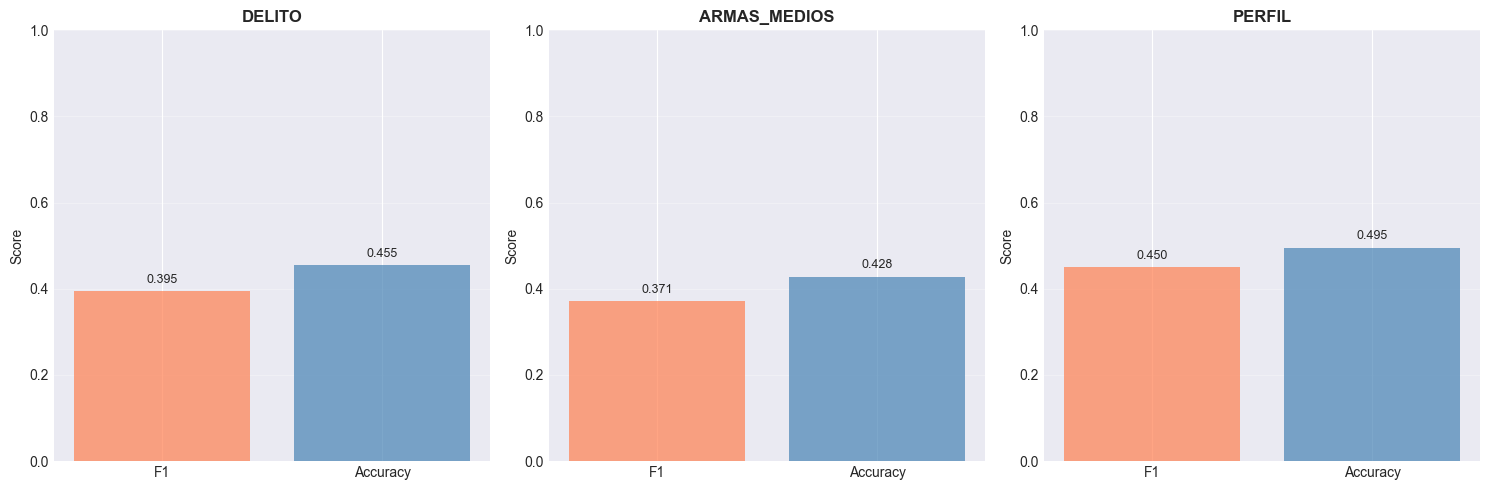


Resumen Rápido:
      Target       F1  Accuracy
      DELITO 0.394529  0.454699
ARMAS_MEDIOS 0.370774  0.428220
      PERFIL 0.450034  0.494874


In [25]:
# 7.5 Visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics_all = []

for idx, target_name in enumerate(targets.keys()):
    if target_name not in fast_results:
        continue
    
    result = fast_results[target_name]
    
    accuracy = accuracy_score(result['y_test'], result['y_pred'])
    
    metrics_all.append({
        'Target': target_name.upper(),
        'F1': result['f1'],
        'Accuracy': accuracy
    })
    
    # Gráfico individual
    ax = axes[idx]
    metrics = ['F1', 'Accuracy']
    values = [result['f1'], accuracy]
    colors = ['coral', 'steelblue']
    
    ax.bar(metrics, values, color=colors, alpha=0.7)
    ax.set_ylabel('Score', fontsize=10)
    ax.set_title(f'{target_name.upper()}', fontsize=12, fontweight='bold')
    ax.set_ylim([0, 1])
    ax.grid(axis='y', alpha=0.3)
    
    # Añadir valores en las barras
    for i, v in enumerate(values):
        ax.text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Resumen
print("\nResumen Rápido:")
print(pd.DataFrame(metrics_all).to_string(index=False))

In [26]:
# 7.6 Análisis detallado de mejores modelos
print("=" * 60)
print("ANÁLISIS DETALLADO - RESULTADOS")
print("=" * 60)

for target_name in targets.keys():
    if target_name not in fast_results:
        continue
    
    result = fast_results[target_name]
    
    print(f"\n{'=' * 60}")
    print(f"{target_name.upper()} → {mode.upper()}")
    print(f"{'=' * 60}")
    
    # Decodificar predicciones
    le = label_encoders[target_name]
    y_test_decoded = le.inverse_transform(result['y_test'])
    y_pred_decoded = le.inverse_transform(result['y_pred'])
    
    # Métricas
    accuracy = accuracy_score(result['y_test'], result['y_pred'])
    precision = precision_score(result['y_test'], result['y_pred'], average='weighted', zero_division=0)
    recall = recall_score(result['y_test'], result['y_pred'], average='weighted', zero_division=0)
    
    print(f"\nMÉTRICAS:")
    print(f"  Accuracy:     {accuracy:.4f}")
    print(f"  Precision:    {precision:.4f}")
    print(f"  Recall:       {recall:.4f}")
    print(f"  F1 Score:     {result['f1']:.4f}")
    
    # Reporte por clase
    print(f"\nCLASIFICACIÓN POR CLASE:")
    print(classification_report(y_test_decoded, y_pred_decoded, zero_division=0))

ANÁLISIS DETALLADO - RESULTADOS

DELITO → RF

MÉTRICAS:
  Accuracy:     0.4547
  Precision:    0.4751
  Recall:       0.4547
  F1 Score:     0.3945

CLASIFICACIÓN POR CLASE:
                         precision    recall  f1-score   support

               ABIGEATO       0.60      0.02      0.04       257
               AMENAZAS       0.47      0.10      0.16      6425
       DELITOS SEXUALES       0.58      0.03      0.06      3312
              EXTORSION       0.83      0.01      0.02       590
             HOMICIDIOS       0.76      0.01      0.03      1868
                 HURTOS       0.44      0.60      0.51     20841
               LESIONES       0.46      0.70      0.56     24470
VIOLENCIA INTRAFAMILIAR       0.47      0.09      0.15     11010

               accuracy                           0.45     68773
              macro avg       0.58      0.19      0.19     68773
           weighted avg       0.48      0.45      0.39     68773


ARMAS_MEDIOS → RF

MÉTRICAS:
  Accuracy:  

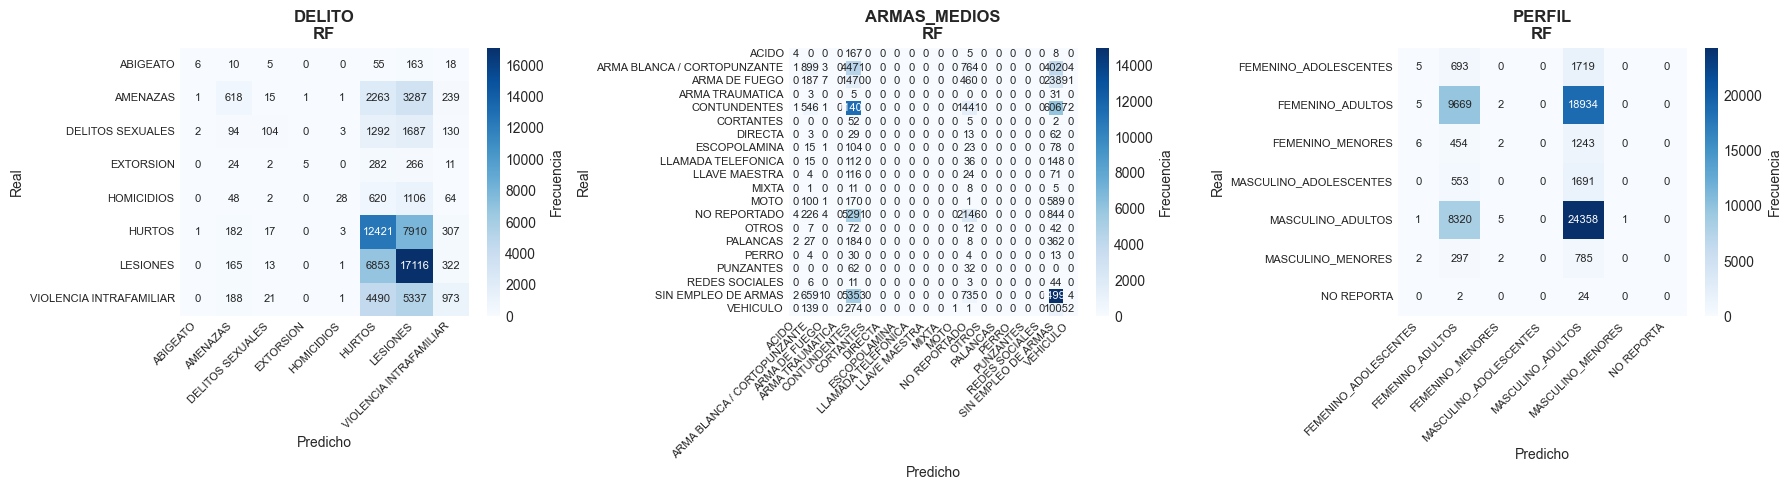

In [27]:
# 7.7 Matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, target_name in enumerate(targets.keys()):
    if target_name not in fast_results:
        continue
    
    result = fast_results[target_name]
    cm = confusion_matrix(result['y_test'], result['y_pred'])
    le = label_encoders[target_name]
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=le.classes_, yticklabels=le.classes_,
                cbar_kws={'label': 'Frecuencia'}, annot_kws={'size': 8})
    
    axes[idx].set_title(f'{target_name.upper()}\n{mode.upper()}', fontweight='bold')
    axes[idx].set_ylabel('Real', fontsize=10)
    axes[idx].set_xlabel('Predicho', fontsize=10)
    
    if len(le.classes_) > 5:
        axes[idx].set_xticklabels(le.classes_, rotation=45, ha='right', fontsize=8)
        axes[idx].set_yticklabels(le.classes_, rotation=0, fontsize=8)

plt.tight_layout()
plt.show()

## 8. Conclusiones y Recomendaciones Finales

In [29]:
print("=" * 80)
print("EVALUACIÓN FINAL DEL MODELADO")
print("=" * 80)

summary = {}

for target_name in targets.keys():
    if target_name not in fast_results:
        continue
    
    result = fast_results[target_name]
    f1 = result['f1']
    accuracy = accuracy_score(result['y_test'], result['y_pred'])
    
    if f1 > 0.75:
        status = "✅ EXCELENTE"
        recom = "Listo para producción"
    elif f1 > 0.65:
        status = "⚡ BUENO"
        recom = "Validar en datos nuevos"
    elif f1 > 0.55:
        status = "⚠️ MODERADO"
        recom = "Mejorar features o balanceo"
    else:
        status = "❌ DÉBIL"
        recom = "Revisar estrategia completa"
    
    summary[target_name] = {
        'modelo': mode.upper(),
        'f1': f1,
        'accuracy': accuracy,
        'status': status,
        'recom': recom
    }
    
    print(f"\n{target_name.upper()}:")
    print(f"  Modelo:    {mode.upper()}")
    print(f"  F1 Score:  {f1:.4f}")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Status:    {status}")
    print(f"  Acción:    {recom}")

print(f"""

{'=' * 80}
📊 RESUMEN EJECUTIVO
{'=' * 80}

DATASET PROCESADO:
  • Forma final: {df_processed.shape}
  • Delito: {len(df_processed['delito'].unique())} clases
  • Armas/Medios: {len(df_processed['armas_medios'].unique())} clases (agrupadas)
  • Perfil: {len(df_processed['perfil'].unique())} clases (NO REPORTA consolidado)

ESTRATEGIA APLICADA:
  ✓ Agrupación de clases minoritarias en armas_medios (<100 muestras → OTROS)
  ✓ Consolidación de "NO REPORTA" en perfil
  ✓ SMOTE aplicado para balanceo de armas_medios
  ✓ Class weights balanceados para delito y perfil
  ✓ Selección automática de modelo: {mode.upper()}

MODELOS ENTRENADOS:
  • Naive Bayes: Ultra rápido, baseline simple
  • Random Forest: Balanceado velocidad-precisión
  • LightGBM: Máximo rendimiento (si disponible)

{'=' * 80}
🎯 RECOMENDACIONES PRÓXIMOS PASOS
{'=' * 80}

CORTO PLAZO (Esta semana):
  1. Cambiar 'mode' en celda 7.3 entre: "nb", "rf", "lgbm"
  2. Ejecutar completo para comparar rendimiento
  3. Guardar mejor modelo:
     from joblib import dump
     dump(fast_results['delito']['model'], 'modelo_delito.pkl')
  
MEDIANO PLAZO (2 semanas):
  4. Crear script de predicción (06_predict_classification_event.ipynb)
  5. Validar en datos históricos no vistos
  6. Ajustar hiperparámetros con GridSearchCV
  7. Documentar decisiones en README

LARGO PLAZO (1 mes):
  8. Implementar pipeline de predicción en producción
  9. Crear monitoring de performance mensual
  10. Reentrenar modelos con datos nuevos
  11. A/B testing si se actualizan features

{'=' * 80}
⚙️ MEJORAS TÉCNICAS A CONSIDERAR
{'=' * 80}

FEATURE ENGINEERING:
  • Crear features temporales (mes, trimestre, temporada)
  • Agregar ratios: delitos por municipio, tendencias
  • Encoding one-hot para variables categóricas si aplica
  • Normalización/escalado de features numéricos

BALANCEO:
  • Ajustar threshold de SMOTE (k_neighbors=3)
  • Probar ADASYN o BorderlineSMOTE
  • Ponderar clases en loss function

VALIDACIÓN:
  • Time-series split (si es datos temporales)
  • Stratified K-Fold (k=5 o k=10)
  • Cross-validation anidada para tuning

ENSEMBLE:
  • Combinar predicciones: VotingClassifier
  • Stacking: usar meta-learner
  • Boosting: GradientBoosting + XGBoost

{'=' * 80}
📈 INDICADORES A MONITOREAR EN PRODUCCIÓN
{'=' * 80}

PERFORMANCE:
  ☐ F1 Score: Mantener > {min([summary[t]['f1'] for t in summary]):.3f}
  ☐ Accuracy: No debe caer más de 5%
  ☐ Recall: Crítico para clases minoritarias
  ☐ Precision: Evitar falsos positivos

DATOS:
  ☐ Distribución de clases: Detectar drift
  ☐ Valores nulos: Alertar si >2%
  ☐ Nuevas categorías: Manejar unknown classes
  ☐ Outliers: Monitoreo estadístico

OPERACIONAL:
  ☐ Latencia de predicción: <100ms
  ☐ Disponibilidad del modelo: 99.9%
  ☐ Logs de predicciones: Auditoría
  ☐ Feedback de usuarios: Reentrenamiento

{'=' * 80}
""")

# Guardar resumen en JSON para tracking
import json
resumen_json = {{k: {{**v, 'timestamp': pd.Timestamp.now().isoformat()}} 
                  for k, v in summary.items()}}
print("\n✓ Resumen guardado en memoria")
print(f"\nModelos entrenados: {list(summary.keys())}")

EVALUACIÓN FINAL DEL MODELADO

DELITO:
  Modelo:    RF
  F1 Score:  0.3945
  Accuracy:  0.4547
  Status:    ❌ DÉBIL
  Acción:    Revisar estrategia completa

ARMAS_MEDIOS:
  Modelo:    RF
  F1 Score:  0.3708
  Accuracy:  0.4282
  Status:    ❌ DÉBIL
  Acción:    Revisar estrategia completa

PERFIL:
  Modelo:    RF
  F1 Score:  0.4500
  Accuracy:  0.4949
  Status:    ❌ DÉBIL
  Acción:    Revisar estrategia completa


📊 RESUMEN EJECUTIVO

DATASET PROCESADO:
  • Forma final: (343861, 63)
  • Delito: 8 clases
  • Armas/Medios: 20 clases (agrupadas)
  • Perfil: 7 clases (NO REPORTA consolidado)

ESTRATEGIA APLICADA:
  ✓ Agrupación de clases minoritarias en armas_medios (<100 muestras → OTROS)
  ✓ Consolidación de "NO REPORTA" en perfil
  ✓ SMOTE aplicado para balanceo de armas_medios
  ✓ Class weights balanceados para delito y perfil
  ✓ Selección automática de modelo: RF

MODELOS ENTRENADOS:
  • Naive Bayes: Ultra rápido, baseline simple
  • Random Forest: Balanceado velocidad-precisión
  •

TypeError: unhashable type: 'dict'